## Process LEMI data from Magdelena Mountains:

These data were downloaded in an already-built mth5 format from
http://ftp.iris.washington.edu/pub/dropoff/buffer/MT_test_data/time_series/

There is also a prototype LEMI data creation notebook in

`mth5/docs/examples/notebooks/lemi_reader_magdelena_2.ipynb`

and in the shortcourse :

`notebooks/mth5/06_make_mth5_from_lemi.ipynb`
`notebooks/mth5/06a_make_mth5_from_lemi.ipynb`

This notebook is set up to use the output from `notebooks/mth5/06_make_mth5_from_lemi.ipynb` (not 6a).

In [1]:
# Required imports for the program. 
import numpy as np
from pathlib import Path
import pandas as pd
import shutil
import warnings

from mth5.clients.make_mth5 import MakeMTH5
from mth5 import mth5, timeseries
from mth5.utils.helpers import initialize_mth5
from mt_metadata.utils.mttime import get_now_utc, MTime
from aurora.config import BANDS_DEFAULT_FILE
from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from mtpy.processing import KernelDataset, RunSummary

warnings.filterwarnings('ignore')

## Set up the path to the file

In [ ]:
here = Path(".").absolute()
mth5_path = here.parent.joinpath("mth5", "from_lemi_02.h5")
assert(mth5_path.exists())

In [2]:
# Sample code for moving files from shared drive

# file_base = "from_lemi.h5"
# source_folder = Path().home().joinpath("shared", "shortcourses", "mt", "lemi")
# source_file = source_folder.joinpath(file_base)
# assert(source_file.exists())

# here = Path(".").absolute()
# target_folder = here.parent.parent.joinpath("data", "timeseries", "lemi")
# target_folder.mkdir(exist_ok=True, parents=True)
# destination_file = target_folder.joinpath(file_base)

# shutil.copyfile(source_file, destination_file)

# mth5_path = destination_file


#mth5_path.exists()

True

In [3]:
mth5_object = initialize_mth5(mth5_path)

In [4]:
# Print some info about the mth5 
mth5_filename = mth5_object.filename
version = mth5_object.file_version
print(f" Filename: {mth5_filename} \n Version: {version}")

 Filename: /home/kkappler/software/irismt/earthscope-mt-course/data/time_series/lemi/from_lemi.h5 
 Version: 0.2.0


In [5]:
#mth5_object.close_mth5()

In [6]:
channel_summary_df = mth5_object.channel_summary.to_dataframe()
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,has_data,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,bx,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,by,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,bz,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,e1,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,e2,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_e,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_h,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,bx,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,by,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,bz,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


In [7]:
mth5_object.channel_summary.clear_table()
channel_summary = mth5_object.channel_summary.summarize()
channel_summary_df = mth5_object.channel_summary.to_dataframe()

In [8]:
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,has_data,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,bx,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,by,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,bz,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,e1,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,e2,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_e,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,iris_test,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_h,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,bx,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,by,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,iris_test,mt001,sr1_0002,34.080655,-107.214079,2202.8,bz,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


##  Compress the Channel Summary to a RunSummary

In [9]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()


24:10:14T13:59:54 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/software/irismt/earthscope-mt-course/data/time_series/lemi/from_lemi.h5


In [10]:
run_summary.df

,channel_scale_factors,duration,end,has_data,input_channels,mth5_path,n_samples,output_channels,run,sample_rate,start,station,survey,run_hdf5_reference,station_hdf5_reference
0,"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",435.0,2020-09-30 20:28:15+00:00,True,"[bx, by]",/home/kkappler/software/irismt/earthscope-mt-c...,436,"[bz, e1, e2]",sr1_0001,1.0,2020-09-30 20:21:00+00:00,mt001,iris_test,<HDF5 object reference>,<HDF5 object reference>
1,"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",796.0,2020-09-30 20:42:16+00:00,True,"[bx, by]",/home/kkappler/software/irismt/earthscope-mt-c...,797,"[bz, e1, e2]",sr1_0002,1.0,2020-09-30 20:29:00+00:00,mt001,iris_test,<HDF5 object reference>,<HDF5 object reference>
2,"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",1021.0,2020-09-30 21:11:01+00:00,True,"[bx, by]",/home/kkappler/software/irismt/earthscope-mt-c...,1022,"[bz, e1, e2]",sr1_0003,1.0,2020-09-30 20:54:00+00:00,mt001,iris_test,<HDF5 object reference>,<HDF5 object reference>
3,"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",105.0,2020-09-30 21:13:45+00:00,True,"[bx, by]",/home/kkappler/software/irismt/earthscope-mt-c...,106,"[bz, e1, e2]",sr1_0004,1.0,2020-09-30 21:12:00+00:00,mt001,iris_test,<HDF5 object reference>,<HDF5 object reference>
4,"{'bx': 1.0, 'by': 1.0, 'bz': 1.0, 'e1': 1.0, '...",589906.0,2020-10-07 17:05:46+00:00,True,"[bx, by]",/home/kkappler/software/irismt/earthscope-mt-c...,589907,"[bz, e1, e2]",sr1_0005,1.0,2020-09-30 21:14:00+00:00,mt001,iris_test,<HDF5 object reference>,<HDF5 object reference>


In [11]:
run_summary.mini_summary

,survey,station,run,start,end,duration
0,iris_test,mt001,sr1_0001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,435.0
1,iris_test,mt001,sr1_0002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,796.0
2,iris_test,mt001,sr1_0003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00,1021.0
3,iris_test,mt001,sr1_0004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00,105.0
4,iris_test,mt001,sr1_0005,2020-09-30 21:14:00+00:00,2020-10-07 17:05:46+00:00,589906.0


In [12]:
local_station_id = "mt001"
remote_station_id = None

In [13]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, remote_station_id)
kernel_dataset.mini_summary

24:10:14T13:59:54 | INFO | line:262 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
24:10:14T13:59:54 | INFO | line:262 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
24:10:14T13:59:54 | INFO | line:262 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
24:10:14T13:59:54 | INFO | line:262 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
24:10:14T13:59:54 | INFO | line:262 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'NoneType'>.


,survey,station,run,start,end,duration
0,iris_test,mt001,sr1_0001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,435.0
1,iris_test,mt001,sr1_0002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,796.0
2,iris_test,mt001,sr1_0003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00,1021.0
3,iris_test,mt001,sr1_0004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00,105.0
4,iris_test,mt001,sr1_0005,2020-09-30 21:14:00+00:00,2020-10-07 17:05:46+00:00,589906.0


Note how only the overlapping portions of the runs are kept

In [14]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)
config.channel_nomenclature.keyword = "LEMI12"

24:10:14T13:59:54 | INFO | line:108 |aurora.config.config_creator | determine_band_specification_style | Bands not defined; setting to EMTF BANDS_DEFAULT_FILE


In [15]:
for decimation in config.decimations:
    decimation.window.type = "hamming"

24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series.window_helpers | available_number_of_windows_in_array | Window is longer than the time series -- no complete windows can be returned
24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series.window_helpers | available_number_of_windows_in_array | Window is longer than the time series -- no complete windows can be returned
24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series.window_helpers | available_number_of_windows_in_array | Window is longer than the time series -- no complete windows can be returned
24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series.window_helpers | available_number_of_windows_in_array | Window is longer than the time series -- no complete windows can be returned
24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series.window_helpers | available_number_of_windows_in_array | Window is longer than the time series -- no complete windows can be returned
24:10:14T13:59:54 | ERROR | line:50 |aurora.time_series

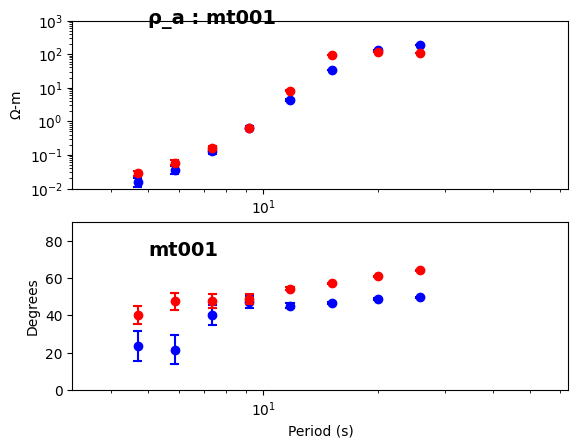

24:10:14T14:00:02 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 1
24:10:14T14:00:02 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 1 Successfully
24:10:14T14:00:02 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel bx with empty filters list detected
24:10:14T14:00:02 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | No filters to remove
24:10:14T14:00:02 | WARNING | line:296 |mt_metadata.timeseries.filters.channel_response | complex_response | No filters associated with <class 'mt_metadata.timeseries.filters.channel_response.ChannelResponse'>, returning 1
24:10:14T14:00:02 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel by with empty filters list detected
24:10:14T14:00:02 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibr

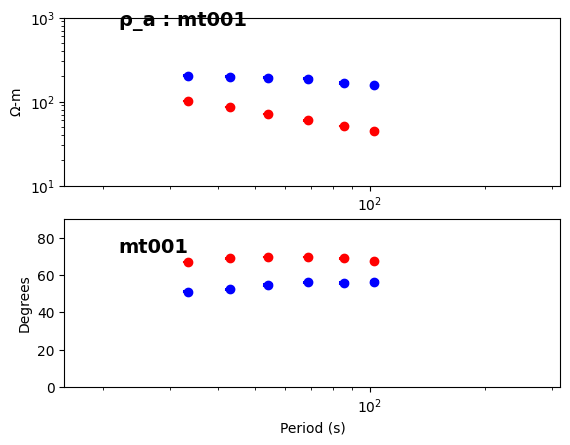

24:10:14T14:00:04 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 2
24:10:14T14:00:04 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 2 Successfully
24:10:14T14:00:04 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel bx with empty filters list detected
24:10:14T14:00:04 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | No filters to remove
24:10:14T14:00:04 | WARNING | line:296 |mt_metadata.timeseries.filters.channel_response | complex_response | No filters associated with <class 'mt_metadata.timeseries.filters.channel_response.ChannelResponse'>, returning 1
24:10:14T14:00:04 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel by with empty filters list detected
24:10:14T14:00:04 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibr

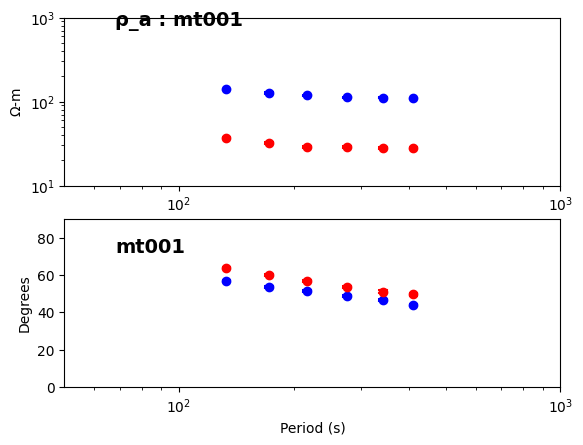

24:10:14T14:00:05 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 3
24:10:14T14:00:05 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 3 Successfully
24:10:14T14:00:05 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel bx with empty filters list detected
24:10:14T14:00:05 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | No filters to remove
24:10:14T14:00:05 | WARNING | line:296 |mt_metadata.timeseries.filters.channel_response | complex_response | No filters associated with <class 'mt_metadata.timeseries.filters.channel_response.ChannelResponse'>, returning 1
24:10:14T14:00:05 | WARNING | line:326 |aurora.pipelines.time_series_helpers | calibrate_stft_obj | Channel by with empty filters list detected
24:10:14T14:00:05 | WARNING | line:340 |aurora.pipelines.time_series_helpers | calibr

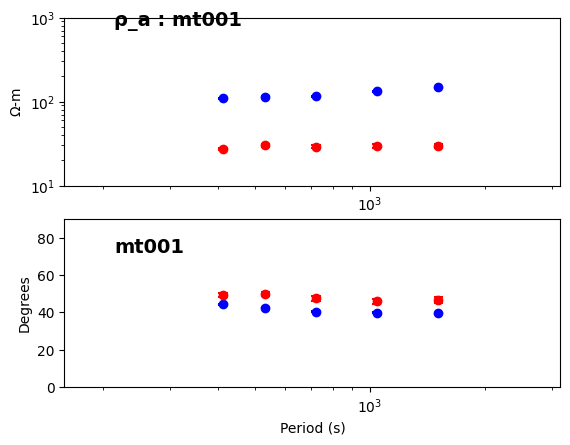

24:10:14T14:00:06 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/software/irismt/earthscope-mt-course/data/time_series/lemi/from_lemi.h5


In [16]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )